In [1]:
import pandas as pd             #it is used to read data from excel, csv etc
import matplotlib.pyplot as plt  #for visualization eg- graphs
import numpy as np
%matplotlib inline         


In [2]:
df = pd.read_csv('Height_weight.csv')

In [3]:
X = df[['Weight']]   #your indenpendt feature should be in dataframe or 2 dimension array
y = df['Height']  

In [4]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

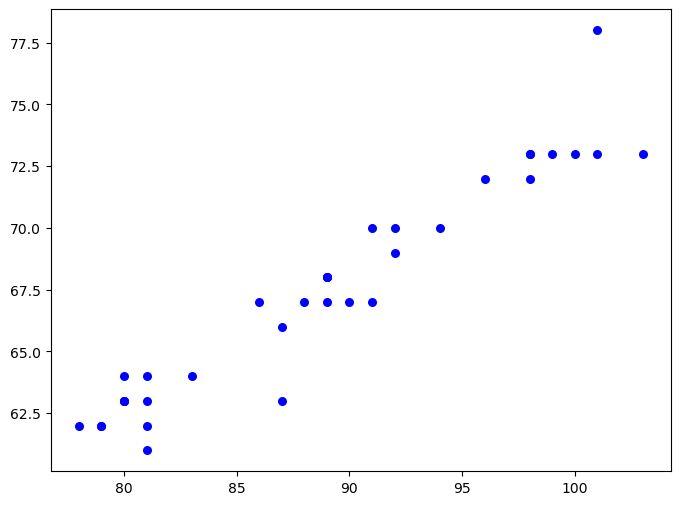

In [5]:
fig = plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, color = 'b', marker = 'o', s = 30)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
reg = LinearRegression()
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

In [21]:
prediction

array([26.0070981 , 24.48669479, 28.17910285, 27.09310048, 26.44149905,
       27.52750142, 25.35549668, 25.35549668, 23.83509336, 23.61789289,
       27.31030095, 26.22429858])

In [22]:
def mse(y_test, prediction):
    return np.mean((y_test - prediction)**2)

In [23]:
mse = mse(y_test, prediction)

In [24]:
mse

1643.0201000601667

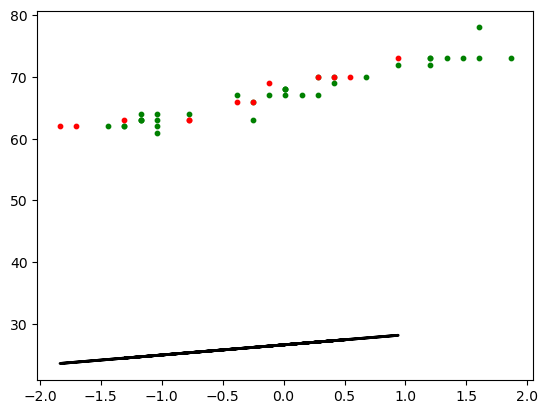

In [25]:
#y_pred_line = reg.predict(X_test)

plt.scatter(X_train, y_train, color='g', s=10)
plt.scatter(X_test, y_test, color= 'r', s=10)
plt.plot(X_test, prediction, color='black', linewidth=2, label='Prediction')


Implimenting linear regression from scratch

In [10]:
import numpy as np

class LinearRegression:
    
    def __init__(self, lr = 0.01, n_iters = 50):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None   #coeffiectn
        self.bias = None    #intercept
        
    def fit(self, X, y): #trainng the model
        n_sample, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weight) + self.bias

            dw = (1/n_sample) * np.dot(X.T, (y_pred-y))
            db = (1/n_sample) * np.sum(y_pred - y)

            self.weight = self.weight - (self.lr * dw)
            self.bias = self.bias - self.lr * db
            
            #print(self.weight," ", self.bias)
        
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred
        